# Exercise #2

Step 1. Use the Python Standard Library to read the currency data for 2020 from the "eurofxref-hist.csv".

In [2]:
# Step 1 Solution

import csv

data = []

with open("data/eurofxref-hist.csv") as csv_file:
    csv_reader = csv.DictReader(csv_file)
    
    for row in csv_reader:
        if (row['Date'].startswith('2020')):
            data.append(row)
        
print(data[:5])

[{'Date': '2020-12-31', 'USD': '1.2271', 'JPY': '126.49', 'BGN': '1.9558', 'CYP': 'N/A', 'CZK': '26.242', 'DKK': '7.4409', 'EEK': 'N/A', 'GBP': '0.89903', 'HUF': '363.89', 'LTL': 'N/A', 'LVL': 'N/A', 'MTL': 'N/A', 'PLN': '4.5597', 'ROL': 'N/A', 'RON': '4.8683', 'SEK': '10.0343', 'SIT': 'N/A', 'SKK': 'N/A', 'CHF': '1.0802', 'ISK': '156.1', 'NOK': '10.4703', 'HRK': '7.5519', 'RUB': '91.4671', 'TRL': 'N/A', 'TRY': '9.1131', 'AUD': '1.5896', 'BRL': '6.3735', 'CAD': '1.5633', 'CNY': '8.0225', 'HKD': '9.5142', 'IDR': '17240.76', 'ILS': '3.9447', 'INR': '89.6605', 'KRW': '1336', 'MXN': '24.416', 'MYR': '4.934', 'NZD': '1.6984', 'PHP': '59.125', 'SGD': '1.6218', 'THB': '36.727', 'ZAR': '18.0219', '': ''}, {'Date': '2020-12-30', 'USD': '1.2281', 'JPY': '126.57', 'BGN': '1.9558', 'CYP': 'N/A', 'CZK': '26.252', 'DKK': '7.4393', 'EEK': 'N/A', 'GBP': '0.90307', 'HUF': '364.88', 'LTL': 'N/A', 'LVL': 'N/A', 'MTL': 'N/A', 'PLN': '4.5565', 'ROL': 'N/A', 'RON': '4.8681', 'SEK': '10.0568', 'SIT': 'N/A', 

Step 2. Create a new NumPy Array from the loaded currency data. The array should only contain the following columns: USD, CAD, JPY, and the RUB. 

In [3]:
# Step 2 Solution

import numpy as np

rates = []

for row in data:
    rates.append([ float(row["USD"]), float(row['CAD']), float(row['JPY']), float(row['RUB']) ])

rates = np.array(rates)

print(rates.shape)
print(rates.size)

rates

(257, 4)
1028


array([[  1.2271,   1.5633, 126.49  ,  91.4671],
       [  1.2281,   1.5701, 126.57  ,  91.8851],
       [  1.2259,   1.5713, 127.23  ,  90.1883],
       ...,
       [  1.1194,   1.4525, 121.02  ,  69.4047],
       [  1.1147,   1.4471, 120.54  ,  69.119 ],
       [  1.1193,   1.4549, 121.75  ,  69.1893]])

Step 3. Add a new column for EUR data. Initialized each element with a 1. Display the new array with the USD, CAD, JPY, RUB, and EUR columns.

In [7]:
# Step 3 Solution

eur_rates = np.ones( (rates.shape[0], 1) )

# eur_rates

all_rates = np.column_stack([ eur_rates, rates ])

all_rates

array([[  1.    ,   1.2271,   1.5633, 126.49  ,  91.4671],
       [  1.    ,   1.2281,   1.5701, 126.57  ,  91.8851],
       [  1.    ,   1.2259,   1.5713, 127.23  ,  90.1883],
       ...,
       [  1.    ,   1.1194,   1.4525, 121.02  ,  69.4047],
       [  1.    ,   1.1147,   1.4471, 120.54  ,  69.119 ],
       [  1.    ,   1.1193,   1.4549, 121.75  ,  69.1893]])

Step 4. The currency rates are all calculated with respect to the EUR. Update the rates to be calculated with respect to the USD. For each currency column on each row, divide each currency by the value for the USD. Display the array.

In [30]:
# Step 4 Solution

# for row_index in range(all_rates.shape[0]):    
#   [0.8, 1, 1.1, 1.9, 1.1 ] <= [1, 1.2, 1.5, 2.3, 1.4 ] / 1.2
#    all_rates[row_index] = all_rates[row_index] / all_rates[row_index,1]

# usd_col = all_rates[:,1]

# usd_table = np.column_stack([ usd_col, usd_col, usd_col, usd_col, usd_col ])

# print(usd_table.shape)

# all_rates[:,1,np.newaxis].shape
all_rates = all_rates / all_rates[:,1,np.newaxis]
# all_rates = all_rates / all_rates[:,1,None]
# all_rates = all_rates / all_rates[:, [1]]
# all_rates = all_rates / all_rates[:, 1].reshape(257,1)


all_rates


array([[  0.81492951,   1.        ,   1.2739793 , 103.08043354,
         74.53923886],
       [  0.81426594,   1.        ,   1.27847895, 103.06163993,
         74.81890726],
       [  0.81572722,   1.        ,   1.28175218, 103.7849743 ,
         73.56905131],
       ...,
       [  0.89333572,   1.        ,   1.29757013, 108.1114883 ,
         62.00169734],
       [  0.89710236,   1.        ,   1.29819682, 108.1367184 ,
         62.00681798],
       [  0.89341553,   1.        ,   1.29983025, 108.77334048,
         61.81479496]])

Step 5. For the EUR, what was the max and min value for 2020? What was the max and min value for the RUB?

In [31]:
# Step 5 Solution

print(all_rates[:,0].min())
print(all_rates[:,0].max())
print(np.min(all_rates[:,0]))
print(np.max(all_rates[:,0]))

print(all_rates[:,3].min())
print(all_rates[:,3].max())
print(np.min(all_rates[:,3]))
print(np.max(all_rates[:,3]))

0.814265939255761
0.933968431867003
0.814265939255761
0.933968431867003
102.23463687150839
112.01112140871177
102.23463687150839
112.01112140871177


Step 6. Plot the price of th EUR, USD, and CAD for each "day". The date should be represented on the X-axis, and price of the currency on the Y-axis.

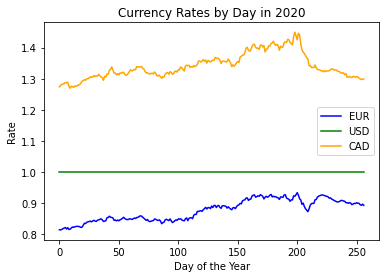

In [33]:
# Step 6 Solution

from matplotlib import pyplot as plt

%matplotlib inline


plt.plot(all_rates[:,0], label="EUR", color="blue")
plt.plot(all_rates[:,1], label="USD", color="green")
plt.plot(all_rates[:,2], label="CAD", color="orange")
# plt.plot(all_rates[:,3], label="JPY", color="purple")
# plt.plot(all_rates[:,4], label="RUB", color="red")

plt.title('Currency Rates by Day in 2020')
plt.xlabel('Day of the Year')
plt.ylabel('Rate')
plt.legend(loc='center right')

plt.show()